## Support Vector Regression Implementation

In [21]:
## Datasets (tips dataset)
import seaborn as sns 
df=sns.load_dataset('tips')


In [22]:
df.head(5)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [23]:
df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [25]:
df['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [26]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [27]:
df['tip'].value_counts()

tip
2.00    33
3.00    23
4.00    12
2.50    10
5.00    10
        ..
1.47     1
1.17     1
4.67     1
5.92     1
1.75     1
Name: count, Length: 123, dtype: int64

In [28]:
df['size'].value_counts()

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64

In [29]:
df['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [30]:
### feature engineering (FEATURE ENCODING  LABEL ENCODING ONE HOT ENCODING )
## independent and dependant features
X=df[['tip','sex','smoker','day','time','size']]
y=df['total_bill']

In [31]:
## traintest split 
from sklearn.model_selection import train_test_split
X_TRAIN ,X_TEST, Y_TRAIN, Y_TEST =train_test_split(X,y,test_size=0.30,random_state=10)

## Now feature encoding of the datasets 

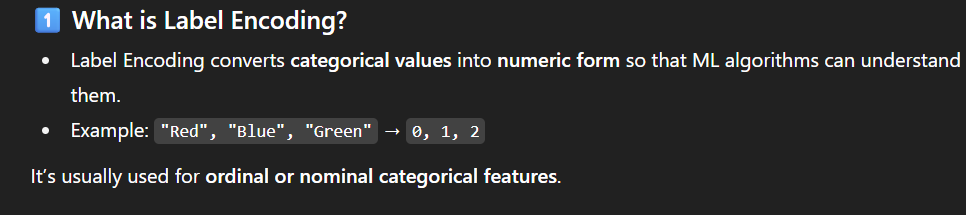
-------------------------------------------
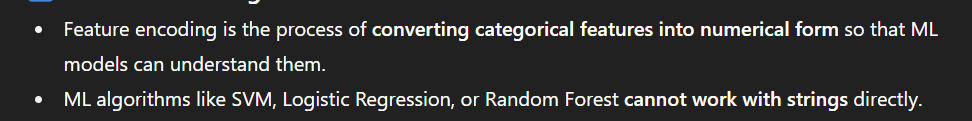
-------------------------------------------
--------------------------------------------
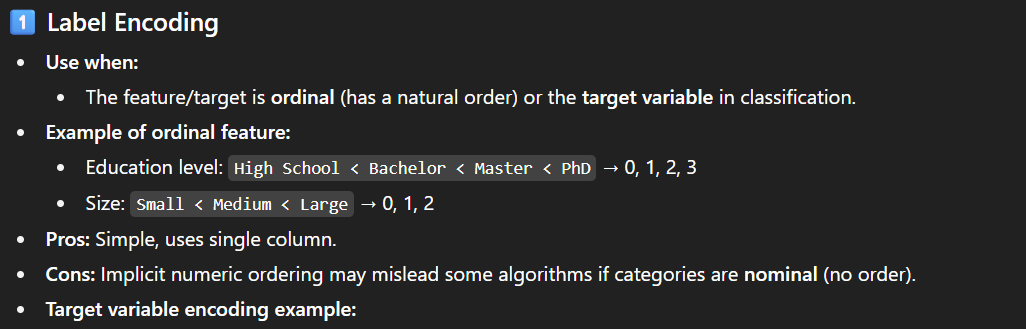
------------------------------------------
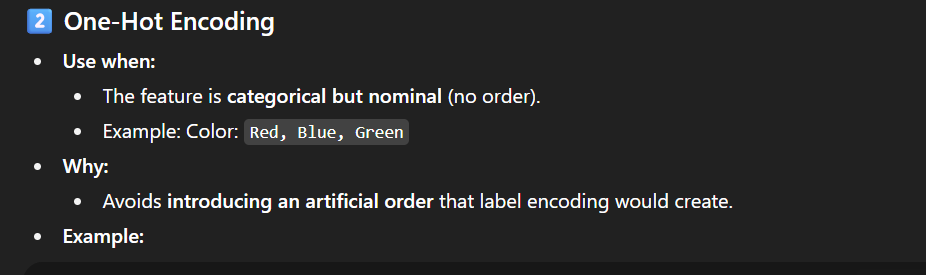

In [33]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()

In [34]:
X_TRAIN['sex']=le1.fit_transform(X_TRAIN['sex'])
X_TRAIN['smoker']=le2.fit_transform(X_TRAIN['smoker'])
X_TRAIN['time']=le3.fit_transform(X_TRAIN['time'])

In [36]:
X_TRAIN.head()

,tip,sex,smoker,day,time,size
39,5.00,1,0,Sat,0,3
87,4.00,1,0,Thur,1,2
169,2.00,0,1,Sat,0,2
232,3.39,1,0,Sat,0,2
144,2.30,0,0,Thur,1,2


In [40]:
X_TEST['sex']=le1.transform(X_TEST['sex'])
X_TEST['smoker']=le2.transform(X_TEST['smoker'])
X_TEST['time']=le3.transform(X_TEST['time'])

## OneHOT encoding transformer  --- Column Transformer 

In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [48]:
ct=ColumnTransformer(transformers=[('onehot',OneHotEncoder(drop='first'),[3])],remainder='passthrough')
## the index which we have given as 3 otherwise it will through error of the array size context 

In [49]:
ct.fit_transform(X_TRAIN)

array([[1., 0., 0., ..., 0., 0., 3.],
       [0., 0., 1., ..., 0., 1., 2.],
       [1., 0., 0., ..., 1., 0., 2.],
       ...,
       [1., 0., 0., ..., 0., 0., 2.],
       [0., 0., 1., ..., 0., 1., 6.],
       [0., 1., 0., ..., 0., 0., 2.]], shape=(170, 8))

In [54]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
X_TRAIN=ct.fit_transform(X_TRAIN)

In [55]:
X_TEST=ct.transform(X_TEST)

In [56]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
svr.fit(X_TRAIN,Y_TRAIN)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [57]:
y_pred = svr.predict(X_TEST)

In [58]:
y_pred

array([16.74069178, 17.93432101, 14.53214377, 24.57610145, 14.72112982,
       22.6651958 , 19.06954361, 27.97748695, 23.68525897, 21.43246141,
       24.80479388, 17.87401849, 13.25067481, 22.40577257, 19.77422049,
       14.88134533, 13.73270257, 13.24716141, 21.37834129, 17.76685153,
       14.28058167, 15.65063484, 14.10562521, 13.18770633, 28.93952698,
       13.73270257, 17.50172705, 21.24385875, 14.62934964, 29.38401536,
       28.14292901, 27.7430372 , 14.77440876, 15.93171029, 17.56012117,
       13.36339882, 20.50686113, 14.57788554, 20.84659845, 22.23481447,
       16.74154486, 21.63044038, 13.05443025, 24.3147992 , 14.05166136,
       14.04360823, 18.49361029, 14.77440876, 13.56690651, 18.75884237,
       20.82779563, 29.13619954, 19.50236347, 27.43905755, 12.77987312,
       17.00651496, 14.06884579, 13.99349176, 18.00034667, 13.92952499,
       17.3938163 , 14.09327746, 16.25043354, 21.47598393, 14.12664494,
       17.66993831, 20.54850525, 28.21859596, 24.66244454, 28.18

In [61]:
from sklearn.metrics import r2_score,mean_absolute_error
print(r2_score(Y_TEST,y_pred))
print(mean_absolute_error(Y_TEST,y_pred))

0.4315615649533616
4.55990805132185


In [63]:
#### Hyperparameter using grid search cv
## defining the parameter range 
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,1000],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf']}

In [64]:
grid=GridSearchCV(SVR(),param_grid,refit=True,verbose=3)
## fitting the model for grid seach 
grid.fit(X_TRAIN,Y_TRAIN)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.010 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.237 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.026 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.078 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.001 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.067 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.109 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.114 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.058 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.040 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

,estimator,SVR()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,kernel,'rbf'


In [65]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [67]:
grid_prediction=grid.predict(X_TEST)
print(r2_score(Y_TEST,grid_prediction))

0.5073235317948023


### R2 improves somewhat